In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Coin simulation ##

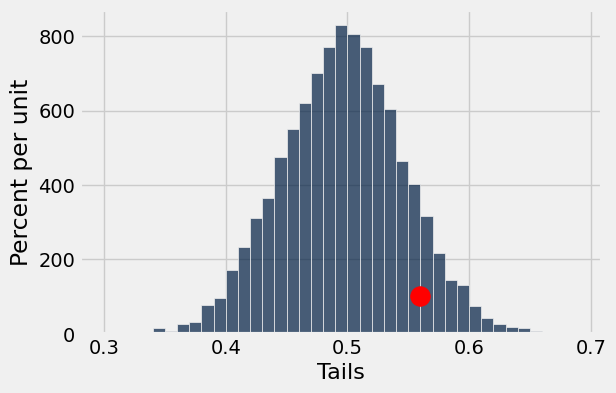

In [12]:
# Flip a coin 100 times and count the tails
# Repeat this experiment 10,000 times.

model_proportions = make_array(0.5, 0.5)
repetitions = 10000

observations = make_array()

for r in np.arange(repetitions):
    observations = np.append(observations, sample_proportions(100, model_proportions).item(0))

Table().with_columns('Tails', observations).hist(bins = np.arange(0.3, 0.7, 0.01))
plots.scatter(0.56, 1, c='r', s=200)

In [14]:
# Find the probability of getting AT LEAST 56 tails:

sum(observations >= .56) / repetitions

0.1396

In [15]:
sum(observations == .50) / repetitions

0.083000000000000004

## Alameda County Jury Panels ##

In [16]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


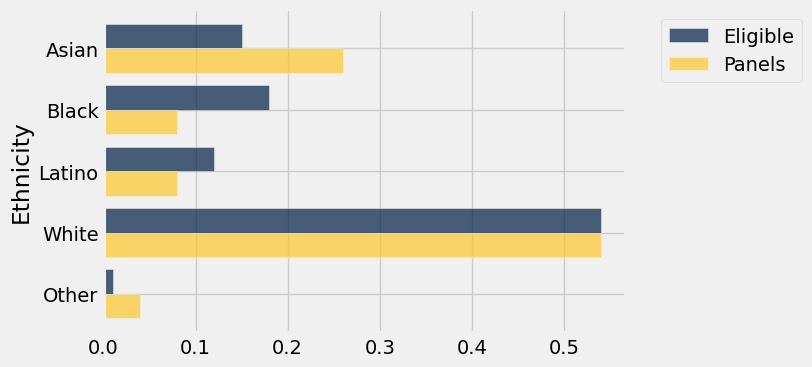

In [17]:
jury.barh('Ethnicity')

In [18]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [20]:
 # Let's simulate a random draw of 1453 jurors from this distribution
simulated = sample_proportions(1453, model)
simulated

array([ 0.16448727,  0.17412251,  0.13902271,  0.51410874,  0.00825877])

In [21]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.164487
Black,0.18,0.08,0.174123
Latino,0.12,0.08,0.139023
White,0.54,0.54,0.514109
Other,0.01,0.04,0.00825877


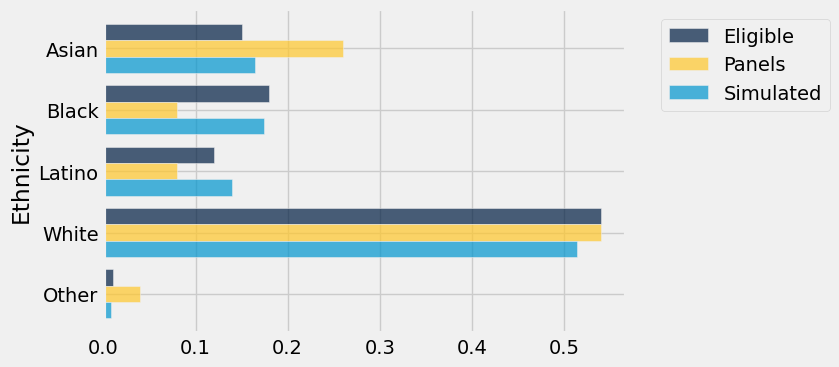

In [22]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [23]:
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [24]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [25]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [33]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1453, model), jury.column('Eligible'))

0.013324156916724015

In [34]:
def simulated_tvd():
    return tvd(sample_proportions(1453, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


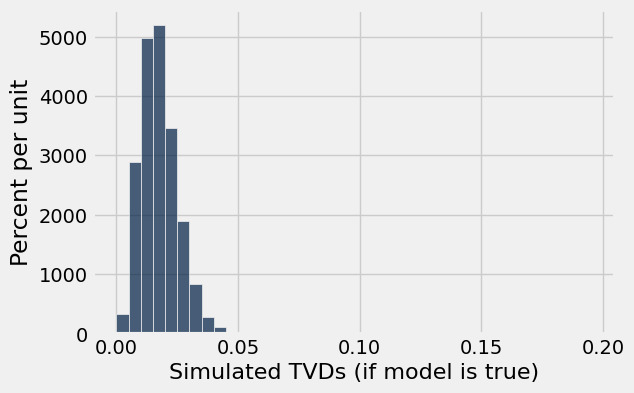

In [35]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .20, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

In [36]:
Table().with_column(title, tvds).sort(title, descending=True)


Simulated TVDs (if model is true)
0.0510323
0.0506676
0.0499794
0.0494494
0.0488507
0.0475912
0.0465864
0.0465038
0.0460083
0.0456848
